<b><font size=20, color='#A020F0'>Class Notebook 3

## Welcome to your third in-class jupyter notebook activity!
In this notebook you'll get more practice with pandas. We'll be using data from the [Survey of Earned Doctorates](https://www.nsf.gov/statistics/srvydoctorates/), an annual survey sponsored by the National Science Foundation, the National Institutes of Health, the Department of Education, and National Endowment for the Humanities. The SED collects information on how many doctorates were earned in a given year, the field in which they were earned, and demographic information on the recipients. We will also be using demographic data from the [U.S. Census Bureau](https://www.census.gov/).

---

<b><font color='red'>Due Date: 08 October 2021</font></b><br>(by the end of class)

<b>How you will turn in this assignment</b><br> When you are ready to turn in your notebook, do the following:
1. Save your notebook and make sure your results are visible (cells have been executed)
2. Open a terminal and navigate to your local `AOS573` repository
3. If you haven't done so, move your completed in-class notebook into your InClass directory (if you opened and worked on the notebook from this directory you don't need to do anything).
4. Use `git add` and `git commit -m` to add and commit ClassNotebook3 to your local `AOS573` git repository
5. Finally, `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)

---

## 1. Reading in and summarizing your data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.1 Use pandas to read in the file 'earth_sci_phds_1980_2019.csv'
This is a data table that I built with NSF's '[build table](https://ncsesdata.nsf.gov/builder/sed)' option on the NSF SED site. It contains information about the people who received PhDs in the combined fields of 'geosciences, atmospheric sciences, and ocean sciences.' I've taken that data and formatted it to make it a bit easier for you to read in. I encourage you to explore that site and build your own tables at some point--there is a lot of illuminating data there.

To properly format the data when you are reading it in, set the two following arguments: 
1. header=[0,1]
2. index_col=0

In [2]:
df=pd.read_csv('earth_sci_phds_1980_2019.csv',header=[0,1],index_col=0)

### 1.2 Get to know your data

#### 1.2.1 Print some summary info for your dataset. What kind of information does the dataset provide?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2019 to 1980
Data columns (total 18 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   (Hispanic or Latino, Male)                                          40 non-null     int64  
 1   (Hispanic or Latino, Female)                                        36 non-null     float64
 2   (American Indian or Alaska Native, Not Hispanic or Latino, Male)    27 non-null     float64
 3   (American Indian or Alaska Native, Not Hispanic or Latino, Female)  17 non-null     float64
 4   (Asian, Not Hispanic or Latino, Male)                               40 non-null     int64  
 5   (Asian, Not Hispanic or Latino, Female)                             39 non-null     float64
 6   (Black or African American, Not Hispanic or Latino, Male)           39 non-null     float64
 7   (Black or Afri

#### 1.2.2 Print the first 6 lines of the table
This data is a pandas [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html), which, in this case, is just another way of saying that the table has sets of column headings nested within another set of column headings. The first level (level 0) is a set of columns for 'Race and Ethnicity', the second level (level 1) is a set of columns for 'Sex'. Each column from the 'Race and Ethnicity' level has 2-3 sub-columns in the 'Sex' level, hence the nested structure of the table. You can see that your dataframe's columns are a MultiIndex by accessing the columns with `your_dataframe.columns`.

In [4]:
df.head(6)

<Race and Ethnicity> Hispanic or Latino         \
<Sex>                              Male Female   
Year                                             
2019                                 26   26.0   
2018                                 24   26.0   
2017                                 26   30.0   
2016                                 23   19.0   
2015                                 20   23.0   
2014                                 21   17.0   

<Race and Ethnicity> American Indian or Alaska Native, Not Hispanic or Latino  \
<Sex>                                                                    Male   
Year                                                                            
2019                                                                2.0         
2018                                                                1.0         
2017                                                                NaN         
2016                                                                3.0         
2015                                                                1.0         
2014                                                                NaN         

<Race and Ethnicity>        Asian, Not Hispanic or Latino         \
<Sex>                Female                          Male Female   
Year                                                               
2019                    2.0                            18   13.0   
2018                    2.0                            23   19.0   
2017                    2.0                            20   26.0   
2016                    1.0                            25   24.0   
2015                    1.0                            13   11.0   
2014                    1.0                             7   16.0   

<Race and Ethnicity> Black or African American, Not Hispanic or Latino         \
<Sex>                                                             Male Female   
Year                                                                            
2019                                                               5.0   10.0   
2018                                                               9.0    2.0   
2017                                                               9.0    5.0   
2016                                                               4.0    6.0   
2015                                                               8.0    5.0   
2014                                                              11.0    6.0   

<Race and Ethnicity> White, Not Hispanic or Latino                     \
<Sex>                                         Male Female Unknown sex   
Year                                                                    
2019                                           360    296         NaN   
2018                                           310    309         NaN   
2017                                           343    286         NaN   
2016                                           373    289         NaN   
2015                                           327    262         NaN   
2014                                           308    296         NaN   

<Race and Ethnicity> More than one race, Not Hispanic or Latino         \
<Sex>                                                      Male Female   
Year                                                                     
2019                                                       10.0   21.0   
2018                                                       12.0   15.0   
2017                                                       11.0   10.0   
2016                                                        5.0   15.0   
2015                                                        7.0    9.0   
2014                                                       12.0   11.0   

<Race and Ethnicity> Other race or race not reported, Not Hispanic or Latino  \
<Sex>                                                                  

#### 1.2.3 Accessing data
Given what you know about accessing columns in a pandas dataframe, return the values of the 'Black or African American, Not Hispanic or Latino' column, but for the 'Male' sub-column only.

In [5]:
df['Black or African American, Not Hispanic or Latino','Male']
#or df['Black or African American, Not Hispanic or Latino']['Male']

Year
2019     5.0
2018     9.0
2017     9.0
2016     4.0
2015     8.0
2014    11.0
2013     8.0
2012    11.0
2011     5.0
2010     7.0
2009     4.0
2008     6.0
2007     8.0
2006     3.0
2005     5.0
2004     5.0
2003     6.0
2002     5.0
2001     2.0
2000     3.0
1999     7.0
1998     4.0
1997     5.0
1996     1.0
1995     1.0
1994     5.0
1993     3.0
1992     6.0
1991     2.0
1990     1.0
1989     2.0
1988     2.0
1987     NaN
1986     1.0
1985     3.0
1984     2.0
1983     1.0
1982     3.0
1981     2.0
1980     1.0
Name: (Black or African American, Not Hispanic or Latino, Male), dtype: float64

---

## 2. Working with your data

### 2.1 Summing by level and adding columns

#### 2.1.1 Combine sub-columns
Use groupby to combine the Male, Female, and/or Unknown sex sub-columns for each 'race and ethnicity' category and sum them to get the total number of doctoral recipients based solely on race and ethnicity. You'll need to give groupby a level argument and an axis argument (axis=0 is for the rows; axis=1 is for columns, or axis='columns').

In [6]:
df_combined=df.groupby(level=0,axis='columns').sum()
df_combined.head()

<Race and Ethnicity>,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino"
Year,,,,,,,,
2019,4.0,31.0,15.0,46.0,52.0,31.0,9.0,656.0
2018,3.0,42.0,11.0,37.0,50.0,27.0,4.0,619.0
2017,2.0,46.0,14.0,55.0,56.0,21.0,14.0,629.0
2016,4.0,49.0,10.0,48.0,42.0,20.0,2.0,662.0
2015,2.0,24.0,13.0,61.0,43.0,16.0,2.0,589.0


#### 2.1.2 Create a new column in your dataframe
Add a new column in your dataframe that provides the total number of Earth Science doctorate recipients in a given year.

In [7]:
df_combined['Total']=df_combined.sum(axis='columns')
df_combined.head()

<Race and Ethnicity>,"American Indian or Alaska Native, Not Hispanic or Latino","Asian, Not Hispanic or Latino","Black or African American, Not Hispanic or Latino",Ethnicity not reported,Hispanic or Latino,"More than one race, Not Hispanic or Latino","Other race or race not reported, Not Hispanic or Latino","White, Not Hispanic or Latino",Total
Year,,,,,,,,,
2019,4.0,31.0,15.0,46.0,52.0,31.0,9.0,656.0,844.0
2018,3.0,42.0,11.0,37.0,50.0,27.0,4.0,619.0,793.0
2017,2.0,46.0,14.0,55.0,56.0,21.0,14.0,629.0,837.0
2016,4.0,49.0,10.0,48.0,42.0,20.0,2.0,662.0,837.0
2015,2.0,24.0,13.0,61.0,43.0,16.0,2.0,589.0,750.0


### 2.2 Counting doctorates 
Using your result from 2.1.2, find the answers to 1-3 below. Show your results by putting them into a new dataframe with 3 columns labeled 'Max', 'Min' and 'Total' that contain your answers. The index should be the race and ethnicity categories.
1. Find the maximum number of doctorates for each 'race and ethnicity' category
2. Find the minimum number of doctorates for each 'race and ethnicity' category
3. Find the total number of doctorates over all years for each 'race and ethnicity' category

Which category has had the fewest number of doctorates, and which has had the most? Sit with this data for a moment. Does this seem ok to you?

In [8]:
df_mm=pd.DataFrame({'Max':df_combined.max(),'Min':df_combined.min(),'Total':df_combined.sum(axis='rows')})
df_mm

,Max,Min,Total
<Race and Ethnicity>,,,
"American Indian or Alaska Native, Not Hispanic or Latino",6.0,0.0,77.0
"Asian, Not Hispanic or Latino",99.0,11.0,1192.0
"Black or African American, Not Hispanic or Latino",18.0,1.0,263.0
Ethnicity not reported,62.0,17.0,1631.0
Hispanic or Latino,56.0,2.0,764.0
"More than one race, Not Hispanic or Latino",31.0,0.0,253.0
"Other race or race not reported, Not Hispanic or Latino",14.0,0.0,176.0
"White, Not Hispanic or Latino",662.0,352.0,18633.0
Total,844.0,441.0,22989.0


### 2.3 Plotting the data
Using your result from 2.1.2, make a single-panel plot with lines for each 'race and ethnicity' category over time. You can exclude the 'ethnicity not reported' category for this, but do include the total number of recipients.

Make sure your plot includes a legend, a title, and x and y axis labels

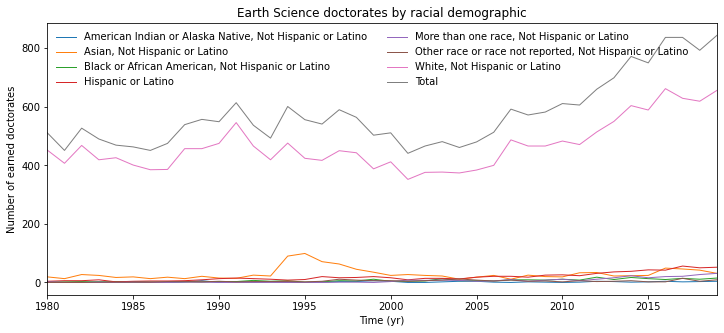

In [9]:
df_combined2=df_combined.drop(columns='Ethnicity not reported')
fig,ax=plt.subplots()
fig.set_size_inches(12,5)
for i in range(0,len(df_combined2.columns)):
    plt.plot(df_combined2[df_combined2.columns[i]],label=df_combined2.columns[i],lw=1);
#plt.ylim(0,100)
plt.xlim(1980,2019)
plt.legend(ncol=2,frameon=False)
plt.title('Earth Science doctorates by racial demographic')
plt.ylabel('Number of earned doctorates')
plt.xlabel('Time (yr)');

### 2.4 Bring in the Census!
While the numbers above may be concerning on their own, it is important to think about them in the context of the total demographic makeup of the U.S., otherwise we won't know if the geo/atmo/ocean sciences PhD demographics are reflective of that. To do that, I've provided demographic data for the entire U.S. population from the [U.S. Census](https://www.census.gov/data/datasets.html) from 2000-2019, which you'll read in below. Keep in mind that the years in between the actual census years (2000, 2010, etc) are estimates, and as a result, you'll see jumps in the data where the estimates from the year before the census don't align particularly well with the results from the actual census.

The datasets I used to create the 2000-2019 data are the following:
1. [National Intercensal Datasets: 2000-2010](https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-national.html)
2. [National Population by Characteristics: 2010-2019](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-detail.html#par_textimage_57373479)

#### 2.4.1 Read in census_2000_2019.csv
Set the `index_col` argument to be the first column.<br> Familiarize yourself with the data, i.e., do you have a general sense of what the columns in the dataframe represent?<br>
Some acronyms that might be helpful:
1. AIAN=American Indian or Alaska Native
2. NHPI=Native Hawaiian and other Pacific Islander

In [12]:
df_census=pd.read_csv('census_2000_2019.csv',index_col=0)
df_census.head()

,White,Black,AIAN,Asian,NHPI,Two or More Races,Hispanic
2000,195701760,34405800,2101969,10468759,370224,3452022,35661884
2001,195974816,34780280,2119929,10925853,383282,3640702,37144096
2002,196140544,35130060,2136918,11372498,396089,3831467,38617620
2003,196232768,35438252,2152127,11801041,408032,4026293,40049428
2004,196461760,35797600,2169359,12219990,421181,4234033,41501376


#### 2.4.2 Add a total population column
Add a new column to your dataframe that shows the total U.S. population over time

In [13]:
df_census['Total']=df_census.sum(axis='columns')
df_census.tail()

,White,Black,AIAN,Asian,NHPI,Two or More Races,Hispanic,Total
2015,247382688,42532492,4004358,17752744,750159,8212721,56254744,376889906
2016,248413056,42970184,4054740,18279948,765814,8457567,57450888,380392197
2017,249270768,43374144,4101605,18764236,780316,8694466,58573528,383559063
2018,249961024,43732024,4145811,19134104,793787,8920749,59639868,386327367
2019,250522192,44075088,4188092,19504862,806937,9142356,60572236,388811763


#### 2.4.3 Compare your doctorate data to the census data
Make a multi-panel set of line plots showing the percentages of doctorates in each 'race and ethnicity' category relative to the total number of doctorates over time. Plot one 'race and ethnicity' category per panel. Using the census data, add a second line to each panel showing the percentage of each 'race and ethnicity' category relative to the total U.S. population over time. Try using a loop to automate the plotting--i.e., loop over your 'race and ethnicity' categories.

1. In the census data, there is no analog to the doctorate data's 'ethnicity not reported' category, so do not make a plot for this
2. Compare the 'Other race or race not reported, Not Hispanic or Latino' category from the doctorate data to the NHPI category from the census. This is likely not a perfect comparison, but in the absense of further information, it is the best we can do.

Which doctorate 'race and ethnicity' categories seem to reflect the U.S. demographics? Which do not?

In [84]:
#Turn data into percentages
df_cen_per=100*df_census.div(df_census.Total, axis=0)
df_sed_per=100*df_combined2.div(df_combined2.Total, axis=0)
#Reorder census data columns to be the same order as the SED data
df_cen_per=df_cen_per[['AIAN', 'Asian', 'Black','Hispanic', 'Two or More Races','NHPI','White','Total']]

In [85]:
print(df_cen_per.columns)
print(df_sed_per.columns)

Index(['AIAN', 'Asian', 'Black', 'Hispanic', 'Two or More Races', 'NHPI',
       'White', 'Total'],
      dtype='object')
Index(['American Indian or Alaska Native, Not Hispanic or Latino',
       'Asian, Not Hispanic or Latino',
       'Black or African American, Not Hispanic or Latino',
       'Hispanic or Latino', 'More than one race, Not Hispanic or Latino',
       'Other race or race not reported, Not Hispanic or Latino',
       'White, Not Hispanic or Latino', 'Total'],
      dtype='object', name='<Race and Ethnicity>')


Text(0.5, 0.98, 'Percentage of Earth Science doctorates by racial demographic compared U.S. totals')

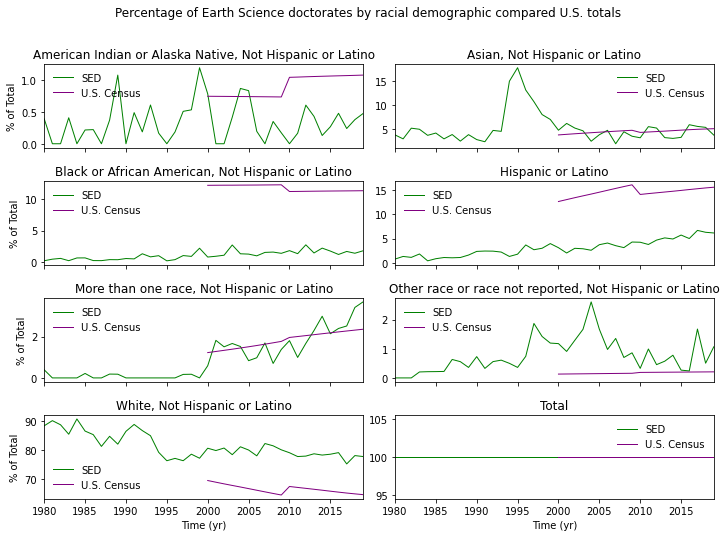

In [98]:
fig,ax=plt.subplots(4,2,sharex=True)
fig.set_size_inches(12,8)
axs=ax.flatten()
for i in range(0,len(df_cen_per.columns)):
    axs[i].plot(df_sed_per[df_sed_per.columns[i]],label='SED',lw=1,color='g');
    axs[i].plot(df_cen_per[df_cen_per.columns[i]],label='U.S. Census',lw=1,color='purple')
    axs[i].set_title(df_combined2.columns[i])
    axs[i].legend(frameon=False)
    if i in [0,2,4,6]:
        axs[i].set_ylabel('% of Total')
    if i in [6,7]:    
        axs[i].set_xlabel('Time (yr)')
#plt.ylim(0,100)
axs[0].set_xlim(1980,2019)
#axs[0].set_ylim(0,100)

plt.subplots_adjust(wspace=0.1,hspace=0.4)

plt.suptitle('Percentage of Earth Science doctorates by racial demographic compared U.S. totals')